In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [30]:
df=pd.read_csv('pdata.csv')

In [31]:
print(df.to_string())

     Person ID  Gender  Age            Occupation  Sleep Duration  Quality of Sleep  Physical Activity Level  Stress Level   BMI Category Blood Pressure  Heart Rate  Daily Steps Sleep Disorder
0            1    Male   27     Software Engineer             6.1                 6                       42             6     Overweight         126/83          77         4200            NaN
1            2    Male   28                Doctor             6.2                 6                       60             8         Normal         125/80          75        10000            NaN
2            3    Male   28                Doctor             6.2                 6                       60             8         Normal         125/80          75        10000            NaN
3            4    Male   28  Sales Representative             5.9                 4                       30             8          Obese         140/90          85         3000    Sleep Apnea
4            5    Male   28  Sales 

In [32]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [33]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [34]:
df.shape

(374, 13)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [36]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [37]:
df['BMI Category']=df['BMI Category'].replace({'Normal Weight':'Normal'})


In [38]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
print(df)

     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

In [39]:
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df = df.rename(columns={0: 'BloodPressure_Upper', 1: 'BloodPressure_Lower'})
df['BloodPressure_Upper'] = df['BloodPressure_Upper'].astype(float)
df['BloodPressure_Lower'] = df['BloodPressure_Lower'].astype(float)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper,BloodPressure_Lower
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


In [40]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper,BloodPressure_Lower
0,1,1,27,9,6.1,6,42,6,2,77,4200,1,126.0,83.0
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
3,4,1,28,6,5.9,4,30,8,1,85,3000,2,140.0,90.0
4,5,1,28,6,5.9,4,30,8,1,85,3000,2,140.0,90.0


In [41]:
# removing id column in data set
df1=df.iloc[:,1:]
df1

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper,BloodPressure_Lower
0,1,27,9,6.1,6,42,6,2,77,4200,1,126.0,83.0
1,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
2,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
3,1,28,6,5.9,4,30,8,1,85,3000,2,140.0,90.0
4,1,28,6,5.9,4,30,8,1,85,3000,2,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,2,68,7000,2,140.0,95.0
370,0,59,5,8.0,9,75,3,2,68,7000,2,140.0,95.0
371,0,59,5,8.1,9,75,3,2,68,7000,2,140.0,95.0
372,0,59,5,8.1,9,75,3,2,68,7000,2,140.0,95.0


In [42]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,374.0,0.505348,0.500641,0.0,0.00,1.0,1.0,1.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0
Occupation,374.0,3.772727,3.056081,0.0,1.00,3.0,5.0,10.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.8,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.0,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.0,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.0,8.0
BMI Category,374.0,0.818182,0.970940,0.0,0.00,0.0,2.0,2.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.0,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.0,10000.0


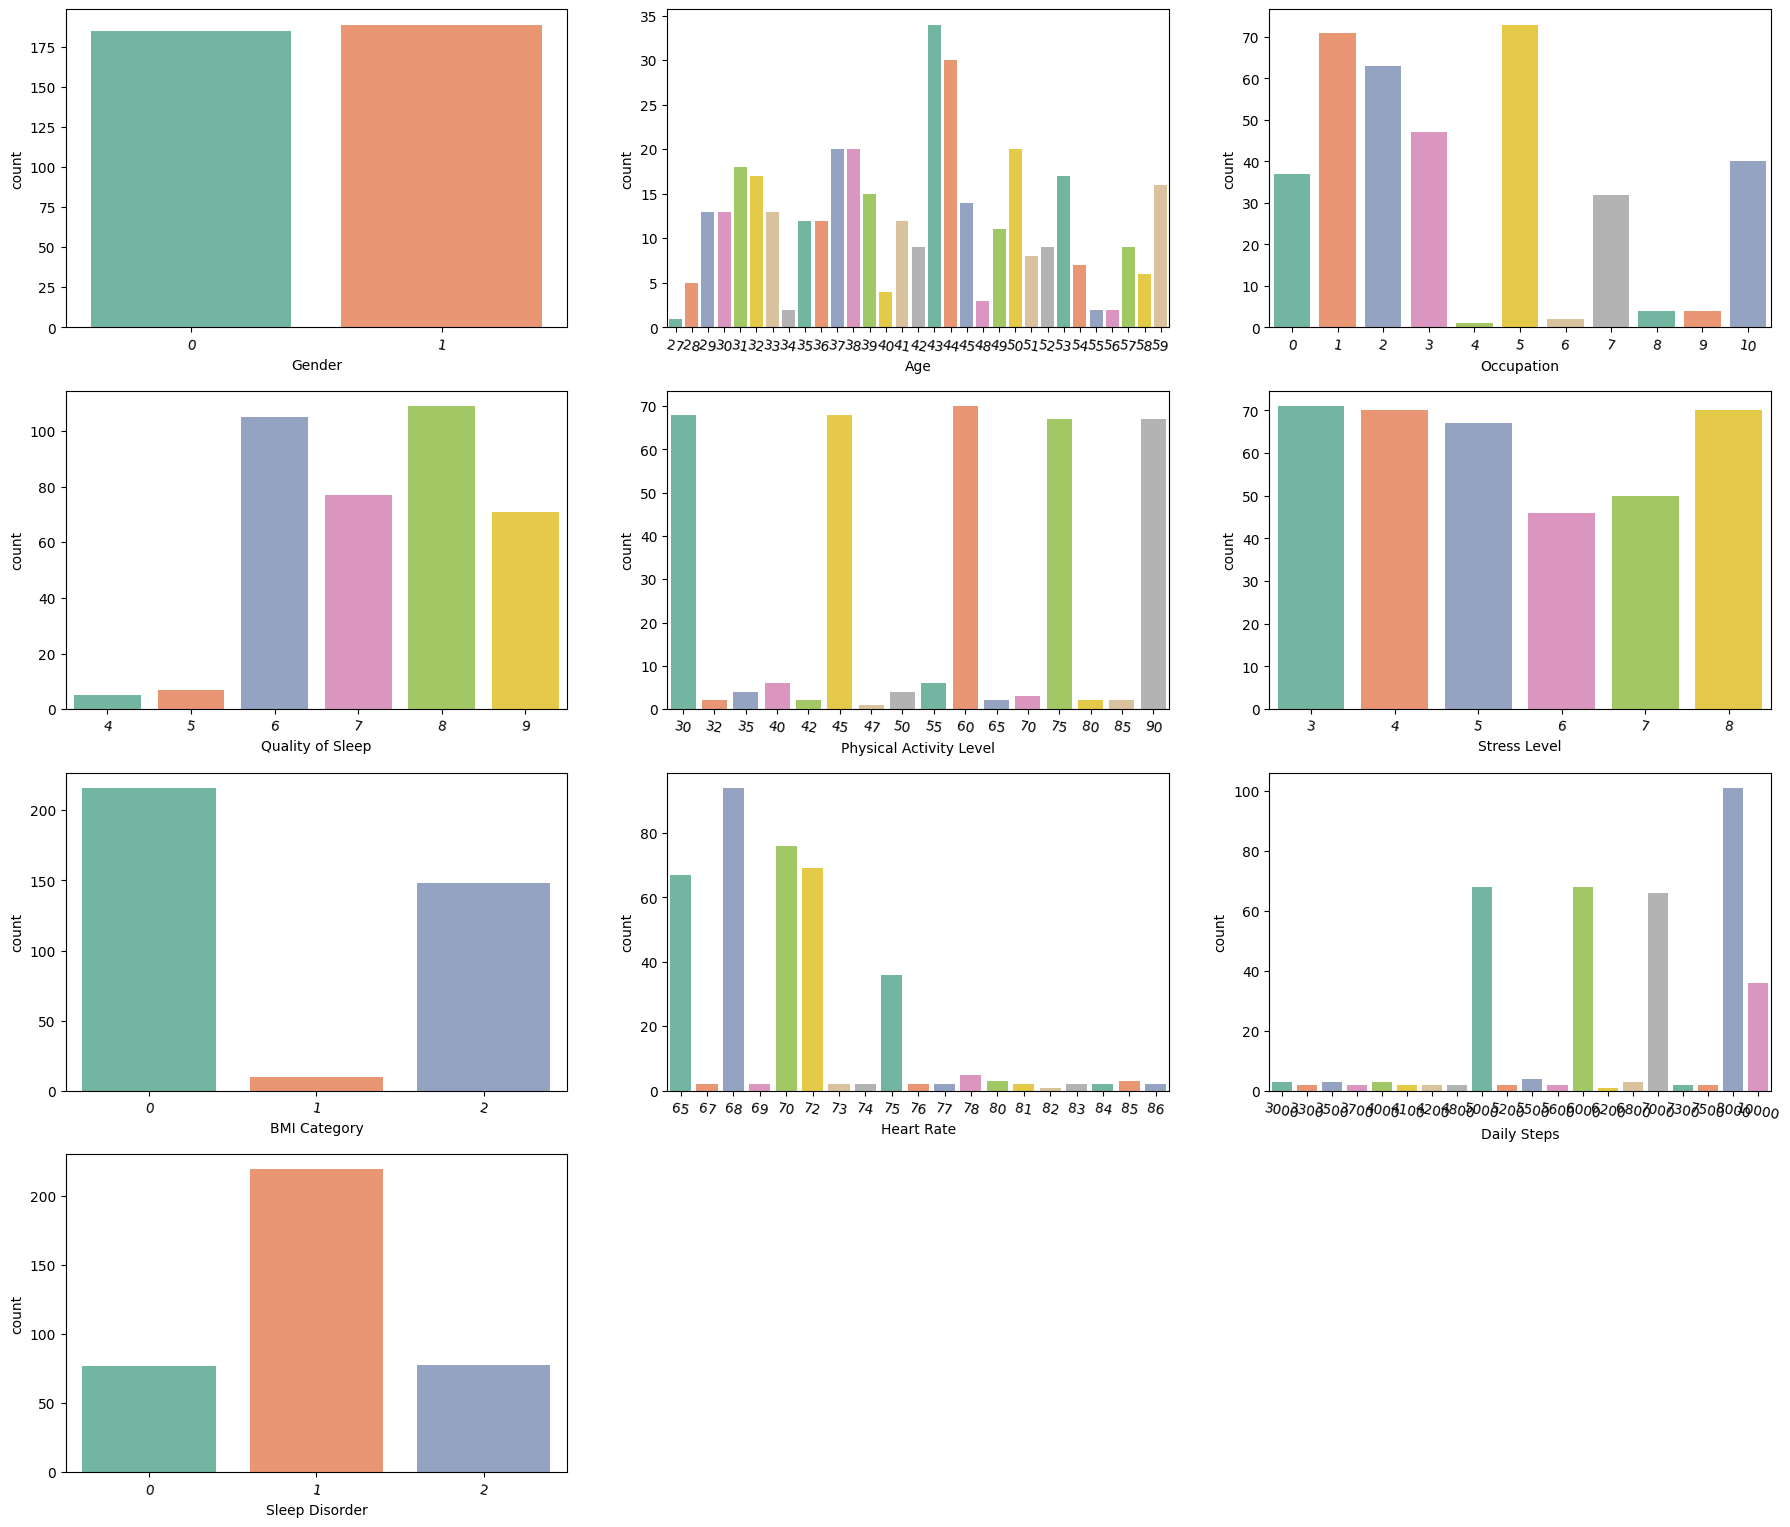

In [43]:
plt.figure(figsize=(22,19))
# Calculate the number of rows needed
num_rows = int(np.ceil(len(df1.select_dtypes(exclude=float).columns) / 3))
for i,col in enumerate(df1.select_dtypes(exclude=float).columns):
    # Use num_rows instead of 3
    plt.subplot(num_rows,3,i+1)
    sns.countplot(data=df,x=col,palette =sns.color_palette("Set2"))
    plt.xticks(rotation=-10)

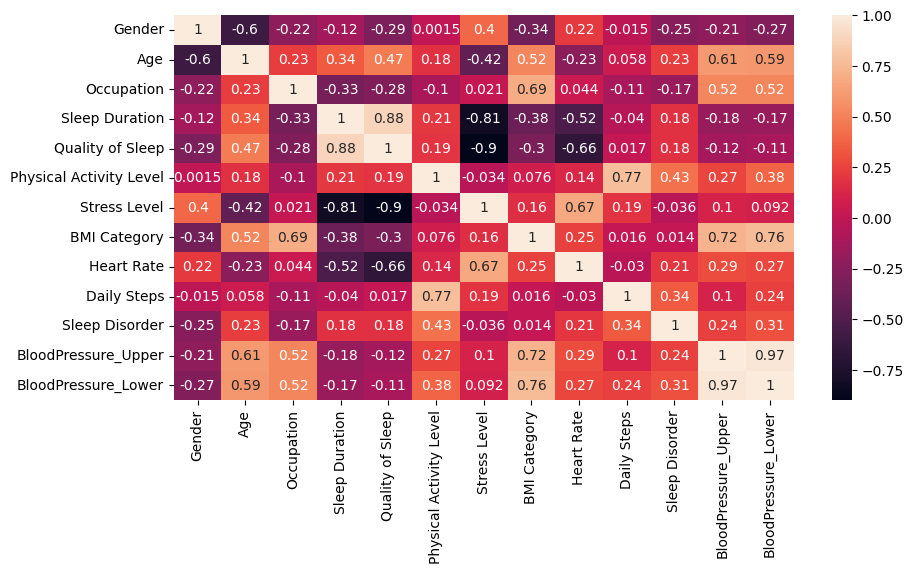

In [44]:
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df1.drop(columns="Sleep Disorder")
y = df1["Sleep Disorder"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=24, shuffle=True)


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scale the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test= scaler.transform(X_test)

In [47]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


xgb_model = XGBClassifier(eval_metric = "auc")
xgb_model.fit(X_train,y_train)
print("accuracy  of xgbis : " ,xgb_model.score(X_test,y_test))
y_predicted = xgb_model.predict(X_test)
print(classification_report(y_test,y_predicted))
print("__________________________________________________")


logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled,y_train)
print("accuracy of log  is : " ,logreg.score(X_test_scaled,y_test))
y_predicted = logreg.predict(X_test_scaled)
print(classification_report(y_test,y_predicted))
print("__________________________________________________")





svml = svm.SVC(kernel='linear')
svml.fit(X_train_scaled, y_train)
print("accuracy of SVM is:", svml.score(X_test_scaled, y_test))
y_predicted = svml.predict(X_test_scaled)
print(classification_report(y_test,y_predicted))
print("__________________________________________________")




rf_clf = RandomForestClassifier(n_estimators=600, criterion='entropy', max_depth=None, random_state=42)
rf_clf.fit(X_train, y_train)
print("accuracy of rf is : " ,rf_clf.score(X_test,y_test))
y_predicted = rf_clf.predict(X_test)
print(classification_report(y_test,y_predicted))
print("__________________________________________________")

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("accuracy of knn is : " ,knn.score(X_test,y_test))
y_predicted = knn.predict(X_test)
print(classification_report(y_test,y_predicted))
print("__________________________________________________")


gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("accuracy of naive bayes is : " ,gnb.score(X_test,y_test))
y_predicted = gnb.predict(X_test)
print(classification_report(y_test,y_predicted))
print("__________________________________________________")


clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("accuracy of decision tree is : " ,clf.score(X_test,y_test))
y_predicted = clf.predict(X_test)
print(classification_report(y_test,y_predicted))
print("__________________________________________________")


mlp = MLPClassifier()


mlp.fit(X_train, y_train)
print("accuracy of mlp is : " ,mlp.score(X_test,y_test))
y_predicted = mlp.predict(X_test)
print(classification_report(y_test,y_predicted))
print("__________________________________________________")


gb_d = GradientBoostingClassifier()
gb_d.fit(X_train, y_train)
print("accuracy of gb is : " ,gb_d.score(X_test,y_test))
y_predicted = gb_d.predict(X_test)
print(classification_report(y_test,y_predicted))
print("__________________________________________________")









accuracy  of xgbis :  0.92
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.96      0.96      0.96        46
           2       0.84      0.94      0.89        17

    accuracy                           0.92        75
   macro avg       0.90      0.88      0.89        75
weighted avg       0.92      0.92      0.92        75

__________________________________________________
accuracy of log  is :  0.8933333333333333
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.93      0.91      0.92        46
           2       0.94      0.88      0.91        17

    accuracy                           0.89        75
   macro avg       0.86      0.88      0.87        75
weighted avg       0.90      0.89      0.90        75

__________________________________________________
accuracy of SVM is: 0.9333333333333333
              precision    r

In [48]:
# Define classifiers
classifiers = {
    'RandomForest':  RandomForestClassifier(n_estimators=600, criterion='entropy', max_depth=None, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=2, metric='euclidean'),
    'MLP': MLPClassifier(hidden_layer_sizes=(24,), learning_rate_init=0.004068331104981341),
    'svm':svm.SVC(),
    'gnb':GaussianNB(),
    'logreg':LogisticRegression(max_iter=1000)
}


In [49]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

def fitness_function(features, classifier):
    # Train the classifier with the subset of features
    clf = classifier

    # Convert features array to boolean mask for proper DataFrame indexing
    features_mask = features.astype(bool)

    X_train_subset = X_train.iloc[:, features_mask] # Use .iloc[] for integer-based indexing with boolean mask
    X_test_subset = X_test.iloc[:, features_mask]

    # Check if the subset is empty
    if X_train_subset.empty or X_test_subset.empty:
        return 0  # Return 0 as fitness if the subset is empty

    clf.fit(X_train_subset, y_train)

    # Calculate the fitness score
    fitness = clf.score(X_test_subset, y_test)

    # Return the fitness score
    return fitness

In [50]:
# Define population size and other parameters
population_size = 12
n_generations = 5

mutation_rate = 0.8


In [51]:
population = np.random.randint(low=0, high=2, size=(population_size, X_train.shape[1]))
population

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1],
       [1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
       [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]])

In [52]:
for clf_name, clf in classifiers.items():
    print(f"Using classifier: {clf_name}")

    # Calculate initial fitness scores
    fitness_scores = [fitness_function(features, clf) for features in population]

    # Iterate through the generations
    for generation in range(n_generations):
        print("Generation : ", generation)

        new_population = []

        for i in range(0, population_size, 2):
            parent_1 = population[np.random.randint(0, population_size)]
            parent_2 = population[np.random.randint(0, population_size)]

            cross_point = np.random.randint(0, X_train.shape[1])
            child_1 = np.concatenate((parent_1[:cross_point], parent_2[cross_point:]))
            child_2 = np.concatenate((parent_2[:cross_point], parent_1[cross_point:]))

            for j in range(X_train.shape[1]):
                if np.random.random() <= mutation_rate:
                    child_1[j] = 1 - child_1[j]
                if np.random.random() <= mutation_rate:
                    child_2[j] = 1 - child_2[j]

            new_population.append(child_1)
            new_population.append(child_2)

        new_fitness_scores = [fitness_function(features, clf) for features in new_population]

        population = new_population
        fitness_scores = new_fitness_scores

        print("Best Fitness Score : ", np.max(fitness_scores))

    best_fitness_index = np.argmax(fitness_scores)
    best_features = population[best_fitness_index]

    clf.fit(X_train.iloc[:, best_features.astype(bool)], y_train) # Use .iloc[] for integer-based indexing with boolean mask
    accuracy = clf.score(X_test.iloc[:, best_features.astype(bool)], y_test) # Use .iloc[] for integer-based indexing with boolean mask

    print(f"Accuracy with {clf_name}: ", accuracy)
    print("Selected Features : ")
    for i in range(X_train.shape[1]):
        if best_features[i] == 1:
            print(X_train.columns[i]) # Access column names using .columns


    print()

Using classifier: RandomForest
Generation :  0
Best Fitness Score :  0.92
Generation :  1
Best Fitness Score :  0.92
Generation :  2
Best Fitness Score :  0.92
Generation :  3
Best Fitness Score :  0.92
Generation :  4
Best Fitness Score :  0.92
Accuracy with RandomForest:  0.92
Selected Features : 
Age
Quality of Sleep
Physical Activity Level
Stress Level
BMI Category
Heart Rate

Using classifier: KNN
Generation :  0
Best Fitness Score :  0.8666666666666667
Generation :  1
Best Fitness Score :  0.92
Generation :  2
Best Fitness Score :  0.88
Generation :  3
Best Fitness Score :  0.8933333333333333
Generation :  4
Best Fitness Score :  0.8933333333333333
Accuracy with KNN:  0.8933333333333333
Selected Features : 
Age
Physical Activity Level
Stress Level
BMI Category
BloodPressure_Upper

Using classifier: MLP
Generation :  0
Best Fitness Score :  0.92
Generation :  1
Best Fitness Score :  0.9333333333333333
Generation :  2
Best Fitness Score :  0.9333333333333333
Generation :  3
Best Fi